#Importaciones

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.optimizers import SGD
from tensorflow import keras

In [ ]:
dataframe = pd.read_csv('Dry_Bean.csv')

In [ ]:
dataframe

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


#Análisis

In [ ]:
dataframe.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

#Pearson

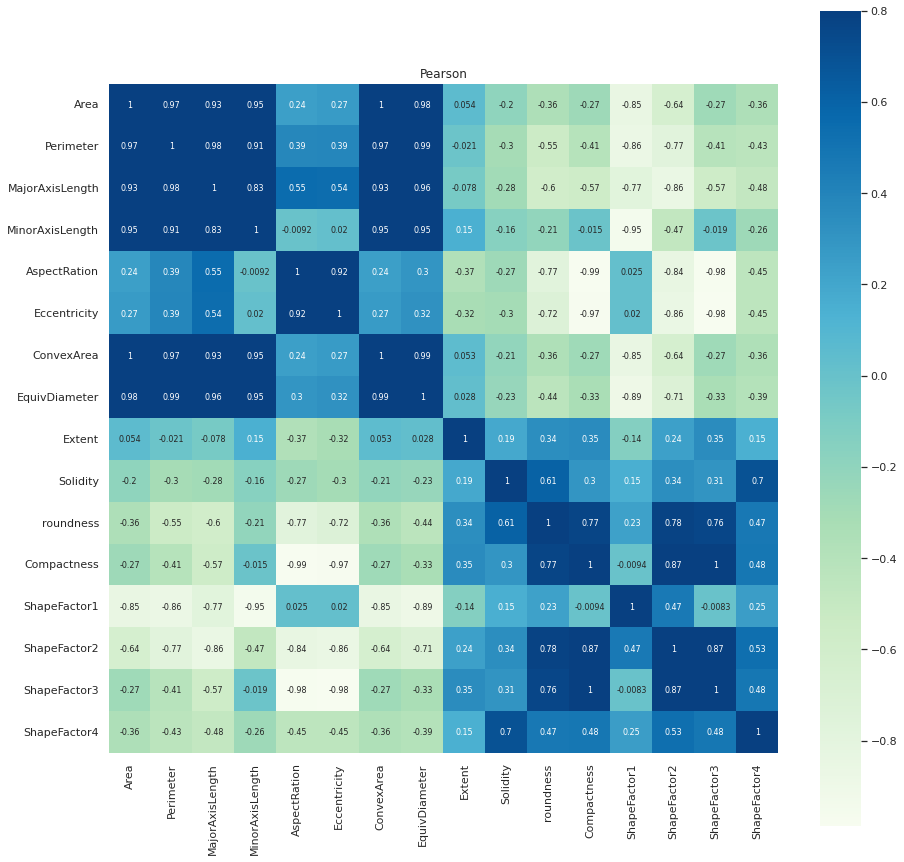

In [ ]:
sns.set(style='whitegrid',font_scale=1)
plt.figure(figsize=(15,15))
plt.title('Pearson')
sns.heatmap(dataframe.corr(),vmax=0.8,square=True,cmap='GnBu',linecolor='b',annot=True,annot_kws={'size':8})

In [ ]:
#major, minor equiv convex
dataframe = dataframe.drop('MajorAxisLength',axis=1)
dataframe = dataframe.drop('MinorAxisLength',axis=1)
dataframe = dataframe.drop('EquivDiameter',axis=1)
dataframe = dataframe.drop('ConvexArea',axis=1)

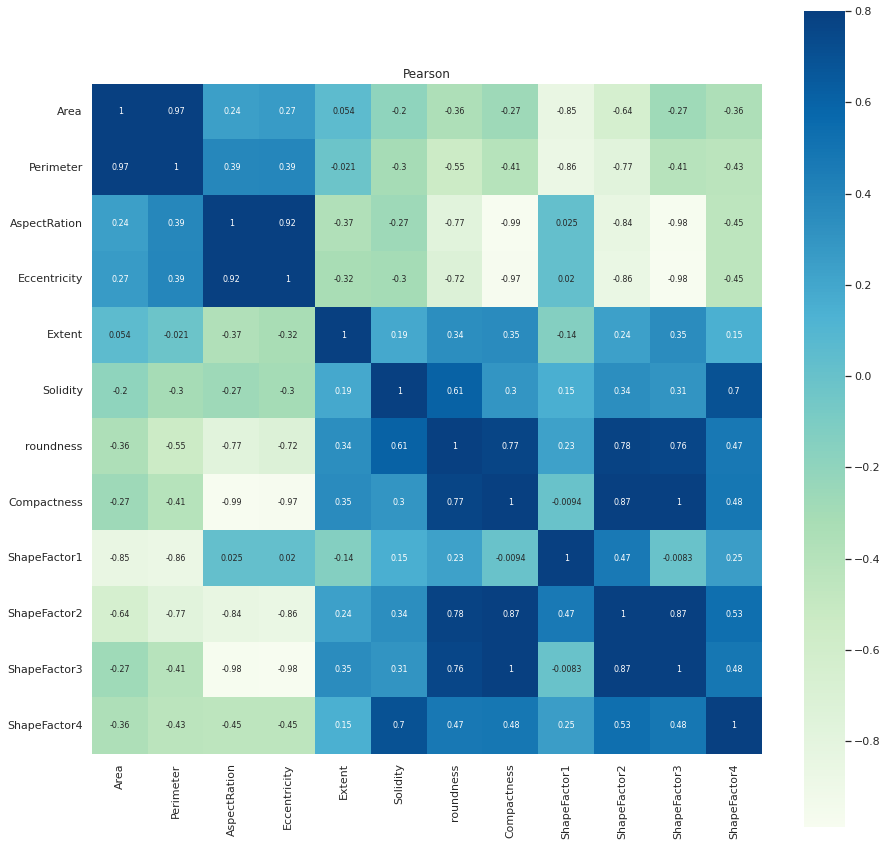

In [ ]:
sns.set(style='whitegrid',font_scale=1)
plt.figure(figsize=(15,15))
plt.title('Pearson')
sns.heatmap(dataframe.corr(),vmax=0.8,square=True,cmap='GnBu',linecolor='b',annot=True,annot_kws={'size':8})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e56321c90>,
      dtype=object)

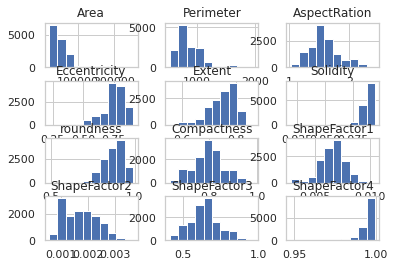

In [ ]:
dataframe.hist()

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area          13611 non-null  int64  
 1   Perimeter     13611 non-null  float64
 2   AspectRation  13611 non-null  float64
 3   Eccentricity  13611 non-null  float64
 4   Extent        13611 non-null  float64
 5   Solidity      13611 non-null  float64
 6   roundness     13611 non-null  float64
 7   Compactness   13611 non-null  float64
 8   ShapeFactor1  13611 non-null  float64
 9   ShapeFactor2  13611 non-null  float64
 10  ShapeFactor3  13611 non-null  float64
 11  ShapeFactor4  13611 non-null  float64
 12  Class         13611 non-null  object 
dtypes: float64(11), int64(1), object(1)
memory usage: 1.4+ MB


In [ ]:
dataframe

,Area,Perimeter,AspectRation,Eccentricity,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,1.197191,0.549812,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,1.097356,0.411785,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,1.209713,0.562727,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,1.153638,0.498616,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,1.060798,0.333680,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,1.552728,0.765002,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,1.476439,0.735702,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,1.472582,0.734065,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,1.489326,0.741055,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [ ]:
dataframe.isnull().sum()

Area            0
Perimeter       0
AspectRation    0
Eccentricity    0
Extent          0
Solidity        0
roundness       0
Compactness     0
ShapeFactor1    0
ShapeFactor2    0
ShapeFactor3    0
ShapeFactor4    0
Class           0
dtype: int64

In [ ]:
#Separar caracteristicas X y Y
x = dataframe.drop('Class',axis=1)
y = dataframe['Class']

In [ ]:
minmaxscaler = MinMaxScaler()
minmaxscaler.fit(x)
x = minmaxscaler.transform(x)

In [ ]:
#X #Y
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=50, test_size=0.30)

In [ ]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [ ]:
ann = Sequential()
ann.add(Dense(10,activation='relu'))
ann.add(Dense(5,activation='relu'))
#ann.add(Dense(3,activation='relu'))
ann.add(Dense(7,activation='sigmoid'))
#sgd = SGD(lr = 0.02, momentum=0.7)
ann.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy') 
#Categorical_crossentropy
#rmsprop adam sgd
#categorical_crossentropy binary_crossentropy metrics='accuracy'

In [ ]:
ann.fit(x=x_train, y=y_train, validation_data=(x_test,y_test),batch_size=40,epochs=100, verbose=1)

Epoch 1/100
239/239 [==============================] - 2s 5ms/step - loss: 1.8091 - accuracy: 0.2347 - val_loss: 1.6505 - val_accuracy: 0.2620
Epoch 2/100
239/239 [==============================] - 1s 4ms/step - loss: 1.4323 - accuracy: 0.4328 - val_loss: 1.2006 - val_accuracy: 0.5735
Epoch 3/100
239/239 [==============================] - 1s 2ms/step - loss: 1.0021 - accuracy: 0.7421 - val_loss: 0.8311 - val_accuracy: 0.7684
Epoch 4/100
239/239 [==============================] - 0s 2ms/step - loss: 0.6995 - accuracy: 0.8360 - val_loss: 0.5925 - val_accuracy: 0.8705
Epoch 5/100
239/239 [==============================] - 1s 2ms/step - loss: 0.5255 - accuracy: 0.8739 - val_loss: 0.4674 - val_accuracy: 0.8805
Epoch 6/100
239/239 [==============================] - 0s 2ms/step - loss: 0.4345 - accuracy: 0.8803 - val_loss: 0.3998 - val_accuracy: 0.8896
Epoch 7/100
239/239 [==============================] - 0s 2ms/step - loss: 0.3867 - accuracy: 0.8815 - val_loss: 0.3623 - val_accuracy: 0.8905

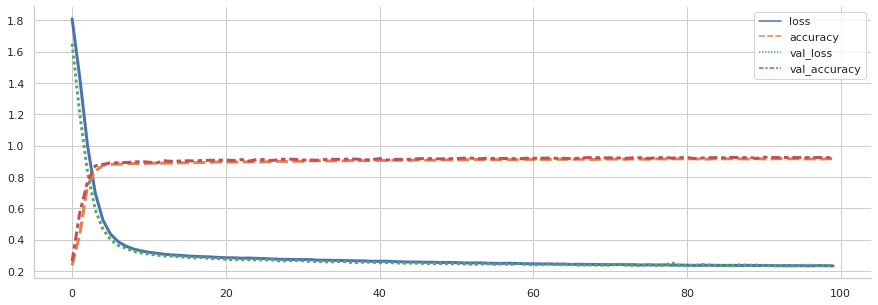

In [ ]:
loss = pd.DataFrame(ann.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=loss, lw=3)
sns.despine()